In [1]:
import numpy as np 
import pandas as pd 
import missingno as msno
from matplotlib import pyplot as plt
import os
os.chdir('C:/HKUST/6010S/kkbox-music-recommendation-challenge')

In [2]:
# Loading data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')
sample = pd.read_csv('sample_submission.csv')
song_extra = pd.read_csv('song_extra_info.csv')

# Data Process

## Merging Dataframes

In [3]:
train_members = pd.merge(train, members, on='msno', how='left')
train_members_songs = pd.merge(train_members, songs, on='song_id', how='left')

test_members = pd.merge(test, members, on='msno', how='left')
test_members_songs = pd.merge(test_members, songs, on='song_id', how='left')

In [4]:
# Before that, we save unique columns in train and test set separately
train_target = train_members_songs['target']
test_id = test_members_songs['id']

# Dropping those columns
train_members_songs.drop('target', axis=1, inplace=True)
test_members_songs.drop('id', axis=1, inplace=True)

train_members_songs['is_train'] = 1
test_members_songs['is_train'] = 0

## Replace the Missing Value

In [5]:
# Visualize the missing values
train_na = train_members_songs.columns[train_members_songs.isnull().any()].tolist()
test_na = test_members_songs.columns[test_members_songs.isnull().any()].tolist()

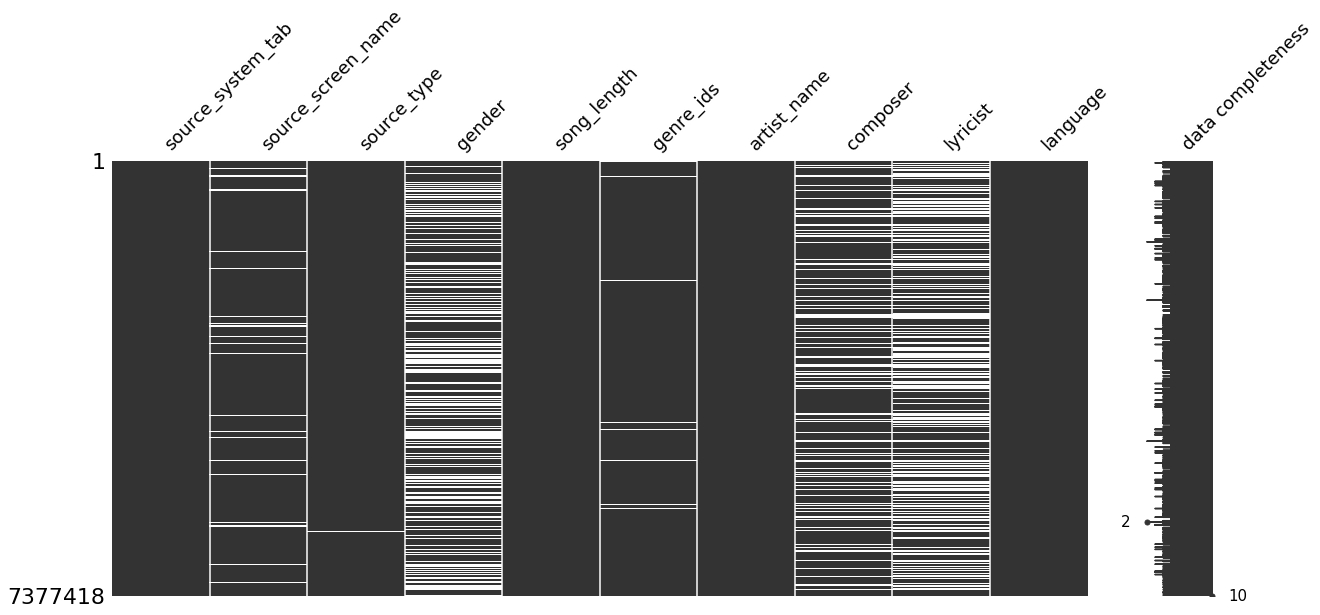

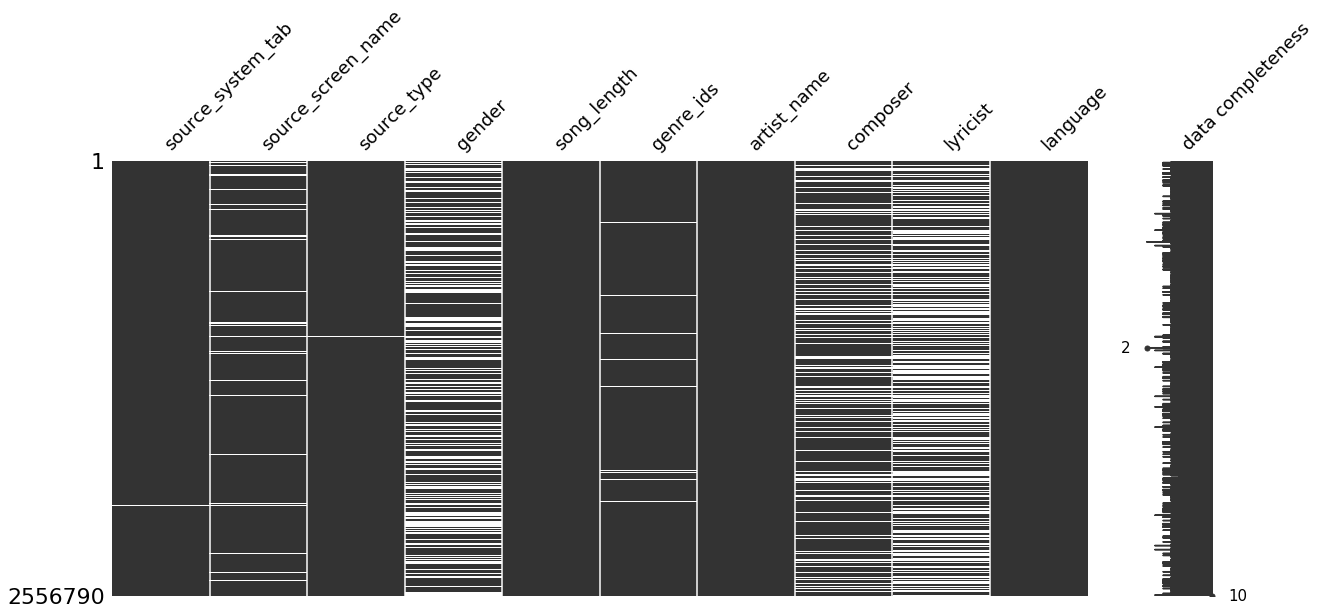

In [6]:
msno.matrix(train_members_songs[train_na],width_ratios=(10,1),\
            figsize=(20,8),color=(0.2,0.2,0.2),fontsize=18,sparkline=True,labels=True)

msno.matrix(test_members_songs[test_na],width_ratios=(10,1),\
            figsize=(20,8),color=(0.2,0.2,0.2),fontsize=18,sparkline=True,labels=True)

In [7]:
print(train_members_songs.isnull().sum())

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
song_length                   114
genre_ids                  118455
artist_name                   114
composer                  1675706
lyricist                  3178798
language                      150
is_train                        0
dtype: int64


In [8]:
# Find out the unique values and their count are the same across train and test data
## source_system_tab
print(train_members_songs.source_system_tab.nunique())
print(test_members_songs.source_system_tab.nunique())

print(train_members_songs.source_system_tab.unique())
print(test_members_songs.source_system_tab.unique())

8
8
['explore' 'my library' 'search' 'discover' nan 'radio' 'listen with'
 'notification' 'settings']
['my library' 'discover' 'radio' 'search' 'listen with' 'explore'
 'settings' nan 'notification']


In [9]:
train_members_songs.source_system_tab = train_members_songs.source_system_tab.fillna('other_system')
test_members_songs.source_system_tab = test_members_songs.source_system_tab.fillna('other_syetem')

In [10]:
## source_screen_name
print(train_members_songs.source_screen_name.nunique())
print(test_members_songs.source_screen_name.nunique())

print(train_members_songs.source_screen_name.unique())
print(test_members_songs.source_screen_name.unique())

20
22
['Explore' 'Local playlist more' nan 'My library' 'Online playlist more'
 'Album more' 'Discover Feature' 'Unknown' 'Discover Chart' 'Radio'
 'Artist more' 'Search' 'Others profile more' 'Search Trends'
 'Discover Genre' 'My library_Search' 'Search Home' 'Discover New'
 'Self profile more' 'Concert' 'Payment']
['Local playlist more' nan 'Radio' 'Online playlist more' 'Artist more'
 'Discover Genre' 'Album more' 'Discover Chart' 'Discover Feature'
 'Search' 'Unknown' 'Explore' 'Others profile more' 'My library'
 'My library_Search' 'Search Trends' 'Discover New' 'Search Home'
 'Payment' 'Self profile more' 'People local' 'Concert' 'People global']


In [11]:
train_screen_unique = list(train_members_songs.source_screen_name.unique())
test_screen_unique = list(test_members_songs.source_screen_name.unique())

print(set(train_screen_unique) & set(test_screen_unique))
print(set(train_screen_unique) ^ set(test_screen_unique))

{nan, 'My library', 'Payment', 'Search Trends', 'Search Home', 'Online playlist more', 'Discover Feature', 'Radio', 'Discover New', 'Discover Genre', 'Discover Chart', 'Unknown', 'Explore', 'Concert', 'Search', 'Album more', 'Self profile more', 'Local playlist more', 'Others profile more', 'My library_Search', 'Artist more'}
{'People global', 'People local'}


In [12]:
train_members_songs.source_screen_name = train_members_songs.source_screen_name.fillna('other_screen')
test_members_songs.source_screen_name = test_members_songs.source_screen_name.fillna('other_screen')
test_members_songs['source_screen_name'] = test_members_songs['source_screen_name'].replace(['People local', 'People global'], 'other_screen')

In [13]:
## source_type
print(train_members_songs.source_type.nunique())
print(test_members_songs.source_type.nunique())

print(train_members_songs.source_type.unique())
print(test_members_songs.source_type.unique())

12
12
['online-playlist' 'local-playlist' 'local-library' 'top-hits-for-artist'
 'album' nan 'song-based-playlist' 'radio' 'song' 'listen-with' 'artist'
 'topic-article-playlist' 'my-daily-playlist']
['local-library' 'song-based-playlist' 'radio' 'local-playlist'
 'online-playlist' 'top-hits-for-artist' 'album' 'song' 'listen-with'
 'my-daily-playlist' 'topic-article-playlist' nan 'artist']


In [14]:
train_members_songs.source_type= train_members_songs.source_type.fillna('other_source')
test_members_songs.source_type = test_members_songs.source_type.fillna('other_source')

In [15]:
## gender
print(train_members_songs.gender.nunique())
print(test_members_songs.gender.nunique())

print(train_members_songs.gender.unique())
print(test_members_songs.gender.unique())

2
2
[nan 'female' 'male']
[nan 'male' 'female']


In [16]:
train_members_songs.gender= train_members_songs.gender.fillna('other_gender')
test_members_songs.gender = test_members_songs.gender.fillna('other_gender')

In [17]:
## song_length
train_members_songs['song_length'].fillna((train_members_songs['song_length'].mean()), inplace=True)
test_members_songs['song_length'].fillna((test_members_songs['song_length'].mean()), inplace=True)

In [18]:
## genre_ids
print(train_members_songs.genre_ids.nunique())
print(test_members_songs.genre_ids.nunique())

print(train_members_songs.genre_ids.unique())
print(test_members_songs.genre_ids.unique())

572
501
['359' '1259' '1019' '1011' '465' '2022' '458' '465|458' nan '1609' '423'
 '921' '451' '437' '465|1259' '444' '921|458' '958' '829' '921|465' '691'
 '940|388' '880|458' '1616|1609' '1616' '139|125|109' '465|430' '1152|829'
 '139' '947' '2157' '940' '726' '786|726' '2122' '458|1287' '786|947'
 '465|1011' '864|850|726|857|843' '786' '786|2122' '242|726' '726|242'
 '352|1995' '444|1259' '698' '465|921' '893' '465|139' '2122|947|958'
 '958|786' '388' '2176|2093' '1152' '430' '465|2122' '1155' '1616|2058'
 '242' '2116|1616' '1180' '864|857|850|843' '465|2022' '1609|465' '873'
 '864|786|850|857|843' '1609|458' '864|850|857|921|843' '900' '2189|367'
 '798' '1572|275' '1609|282' '444|1609' '829|786' '2086' '545' '437|850'
 '465|798' '465|958' '864|843' '2079' '1605' '465|691' '880' '1955'
 '1609|2107' '184|2122' '409' '2072' '726|947' '1138' '893|458' '95'
 '388|940' '2130|947|2122|139|125|109|798|958' '481' '444|786' '649'
 '139|1259' '2107' '1609|2022' '786|947|726|958' '786|947|726'

In [19]:
train_genre_unique = list(train_members_songs.genre_ids.unique())
test_genre_unique = list(test_members_songs.genre_ids.unique())

print(set(train_genre_unique) & set(test_genre_unique))
print(set(train_genre_unique) ^ set(test_genre_unique))

{nan, '198|2122', '2109', '458|359', '1609|2058', '744', '726|958', '880', '1988|1981|430', '465|430', '242|786', '873', '921|1609', '656|1011', '95', '139|691', '1609|359', '1609|2022', '1152|1609', '2065', '444|1259', '465|958', '1152|873|947', '1152|947', '437', '786|947|2086|374|2122', '465|2122|139', '1977', '2248|1259', '465|921|2122', '465|2189|367', '1605', '1019', '1609|2107', '921|2122', '139|125|109|2022', '139|444|109', '798|786', '1054', '864|465|850|857|843', '921|893', '2022|1011', '786|798', '900|465', '388|465', '1259|139', '2122|691', '2022|1259', '465|1145|2122', '880|545', '1280|2093', '177', '444|2022', '786|242', '864|850|726|857|843', '808', '864|850|857|2122|843', '275|1572|359', '1068', '1152|829', '465|1955|2022', '465|458', '1609|2122|2022', '829|359', '726|242', '921|947', '1259|359', '921|2022', '873|786', '444|139', '986', '2122|1259', '864|465|242|850|1609|857|843', '829|437', '786|691', '1965', '864|850|857|921|843', '465|958|2022', '352|1995', '940|786'

In [20]:
train_members_songs.genre_ids= train_members_songs.genre_ids.fillna('other_genre_ids')
test_members_songs.genre_ids = test_members_songs.genre_ids.fillna('other_genre_ids')

In [21]:
## artist_name
print(train_members_songs.artist_name.nunique())
print(test_members_songs.artist_name.nunique())

print(train_members_songs.artist_name.unique())
print(test_members_songs.artist_name.unique())

40582
27563
['Bastille' 'Various Artists' 'Nas' ... 'JD Samson & MEN'
 '2002 Latin Love Songs' 'Salvina y Miren al Lobo']
['梁文音 (Rachel Liang)' '林俊傑 (JJ Lin)' 'Yu Takahashi (高橋優)' ... 'Grand Puba'
 '吳卓羲＆謝天華＆陳鍵鋒 (Ron Ng & Michael Tse & Sammul Chan)' 'Drifting in Silence']


In [22]:
train_artist_name_unique = list(train_members_songs.artist_name.unique())
test_artist_name_unique = list(test_members_songs.artist_name.unique())

print(set(train_artist_name_unique) & set(test_artist_name_unique))
print(set(train_artist_name_unique) ^ set(test_artist_name_unique))

{nan, 'Dean & Britta', 'Barbra Streisand with Billy Joel', 'Angels and Airwaves', 'Melissa Steel', 'Liss', 'Sara Paço', 'Mårten Falk', 'Kasey Chambers', 'Axel Paris', 'Anthrax', '許景淳 (Christine Hsu)', 'Abstract Rude', 'Caravan Palace', 'Daughter', 'Hey Hey My My', 'Uncle Kracker', 'RYAT', 'Sergei Nakariakov', 'Gusttavo Lima', 'Shinedown', 'Machinedrum', 'Cynthia', 'Weird Dreams', 'Shopping', 'Nomiya Maki (野宮真貴)', 'Yoshiki', 'HΛL', 'AQUAPLUS', '許含光 (Lumi)', 'Scream and Shout', 'Seb Skalski', 'Hugo', '陳永馨 (Melody Chen)', 'Cheatahs', 'Hiroko Shimabukuro (島袋寛子)', 'DJ OKAWARI', 'Andrea Bocelli', 'Grigory Sokolov', '劉棟升', 'LeToya', 'Red', 'Irene Cara', 'Wendy| Seulgi (of Red Velvet)', 'Swim Mountain', 'Yong Jin Cho', 'FADED', '看見台灣 電影原聲帶', '川嶋あい', '廖芊芊', 'Beach House', 'Simone Toni', 'Unpretty Rapstar Complation Album 2', 'Ricky Pellegrino', '施文彬 (Michael Shih)', 'Antonia Tyrol', 'Anime That Jazz', 'Supergrass', 'Tabata Productions', 'Brandon Heath', 'Jeru The Damaja', '城市雨人 (THE CITY RAIN M

In [23]:
train_members_songs.artist_name = train_members_songs.artist_name.fillna('other_artist')
test_members_songs.artist_name = test_members_songs.artist_name.fillna('others_artist')

In [24]:
## composer
print(train_members_songs.composer.nunique())
print(test_members_songs.composer.nunique())

print(train_members_songs.composer.unique())
print(test_members_songs.composer.unique())

76064
52306
['Dan Smith| Mark Crew' nan 'N. Jones、W. Adams、J. Lordan、D. Ingle' ...
 'Blake Lewis| Matt Lange' '飛天' 'Wallux| F.Weyer']
['Qi Zheng Zhang' '林俊傑' 'Yu Takahashi' ... 'D. Way| J. Wright'
 'Noel Regney| Gloria Shayne'
 'Colson Baker pka "MGK" for EST| E. Johnson| B. Allen']


In [25]:
train_composer_unique = list(train_members_songs.composer.unique())
test_composer_unique = list(test_members_songs.composer.unique())

print(set(train_composer_unique) & set(test_composer_unique))
print(set(train_composer_unique) ^ set(test_composer_unique))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [26]:
train_members_songs.composer = train_members_songs.composer.fillna('other_composer')
test_members_songs.composer = test_members_songs.composer.fillna('other_composer')

In [27]:
## lyricist
print(train_members_songs.lyricist.nunique())
print(test_members_songs.lyricist.nunique())

print(train_members_songs.lyricist.unique())
print(test_members_songs.lyricist.unique())

33888
24910
[nan 'TEDDY| TAEYANG' '嚴爵' ... 'EMI K.Lynn'
 'Alicia Keys| Aubrey Drake Graham| Kerry "Krucial" Brothers| Noah Shebib'
 'D. Gauriaud| J. Prette| M.Youn| N.Brisson| W. Geslin']
[nan '孫燕姿/易家揚' 'Yu Takahashi' ...
 'Jordan Houston| Kristopher Campbell| Leland Clopton| Mike Foster| Denzel Flexington'
 'Robert Shea Taylor| Sia Furler' '박우상/문별']


In [28]:
train_members_songs.lyricist = train_members_songs.lyricist.fillna('other_lyricist')
test_members_songs.lyricist = test_members_songs.lyricist.fillna('other_lyricist')

In [29]:
## language
print(train_members_songs.language.nunique())
print(test_members_songs.language.nunique())

print(train_members_songs.language.unique())
print(test_members_songs.language.unique())

10
10
[52. -1. 31.  3. 17. 10. 24. 59. 45. nan 38.]
[ 3. 17. 52. -1. 31. 10. 24. 59. 45. nan 38.]


In [30]:
train_members_songs.language= train_members_songs.language.fillna(0)
test_members_songs.language = test_members_songs.language.fillna(0)

# Feature Engineering

In [31]:
# Feature 1 : genre_ids_feature
def genre_id_feature(x):
    if x == 'other_genre_ids':
        return 0
    else:
        return x.count('|') + 1

train_members_songs['genre_id_feature'] = train_members_songs['genre_ids'].apply(genre_id_feature)
test_members_songs['genre_id_feature'] = test_members_songs['genre_ids'].apply(genre_id_feature)

In [32]:
# Feature 2 : composers_feature
def composers_feature(x):
    if x == 'other_composer':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1

train_members_songs['composers_feature'] = train_members_songs['composer'].apply(composers_feature)
test_members_songs['composers_feature'] = test_members_songs['composer'].apply(composers_feature)

In [33]:
# Feature 3 : lyricist_feature
def lyricist_feature(x):
    if x == 'other_lyricist':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1

train_members_songs['lyricist_feature'] = train_members_songs['lyricist'].apply(lyricist_feature)
test_members_songs['lyricist_feature'] = test_members_songs['lyricist'].apply(lyricist_feature)

In [34]:
# Feature 4 : artist_name_feature
def artist_name_feature(x):
    if x == 'other_artist':
        return 0
    else:
        return sum(map(x.count, ['&', 'and', '|', '/', '\\', ';'])) + 1

train_members_songs['artist_name_feature'] = train_members_songs['artist_name'].apply(artist_name_feature)
test_members_songs['artist_name_feature'] = test_members_songs['artist_name'].apply(artist_name_feature)

# LightGBM

In [36]:
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

lbl = preprocessing.LabelEncoder()
train = train_members_songs.drop([ 'msno', 'song_id'], axis=1)
test= test_members_songs.drop([ 'msno', 'song_id'], axis=1)

train['source_system_tab'] = lbl.fit_transform(train['source_system_tab'].astype(str))
train['source_screen_name'] = lbl.fit_transform(train['source_screen_name'].astype(str))
train['source_type'] = lbl.fit_transform(train['source_type'].astype(str))
train['gender'] = lbl.fit_transform(train['gender'].astype(str))
train['genre_ids'] = lbl.fit_transform(train['genre_ids'].astype(str))
train['artist_name'] = lbl.fit_transform(train['artist_name'].astype(str))
train['composer'] = lbl.fit_transform(train['composer'].astype(str))
train['lyricist'] = lbl.fit_transform(train['lyricist'].astype(str))

test['source_system_tab'] = lbl.fit_transform(test['source_system_tab'].astype(str))
test['source_screen_name'] = lbl.fit_transform(test['source_screen_name'].astype(str))
test['source_type'] = lbl.fit_transform(test['source_type'].astype(str))
test['gender'] = lbl.fit_transform(test['gender'].astype(str))
test['genre_ids'] = lbl.fit_transform(test['genre_ids'].astype(str))
test['artist_name'] = lbl.fit_transform(test['artist_name'].astype(str))
test['composer'] = lbl.fit_transform(test['composer'].astype(str))
test['lyricist'] = lbl.fit_transform(test['lyricist'].astype(str))
train_tr, train_val, train_target_tr, train_target_val = train_test_split(train, train_target, test_size=0.25, random_state=5)

In [42]:
import time

params = {
        'objective': 'binary',
        'boosting': 'gbdt',
        'learning_rate': 0.2 ,
        'verbose': 0,
        'num_leaves': 2**8,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'num_rounds': 250,
        'metric' : 'auc'
    }

lgb_train = lgb.Dataset(train_tr, train_target_tr)
lgb_val = lgb.Dataset(train_val, train_target_val)
%time lgbm_model = lgb.train(params, train_set = lgb_train, valid_sets = lgb_val, verbose_eval=25)

[25]	valid_0's auc: 0.715907
[50]	valid_0's auc: 0.730799
[75]	valid_0's auc: 0.739958
[100]	valid_0's auc: 0.746653
[125]	valid_0's auc: 0.751894
[150]	valid_0's auc: 0.756308
[175]	valid_0's auc: 0.760359
[200]	valid_0's auc: 0.763974
[225]	valid_0's auc: 0.767705
[250]	valid_0's auc: 0.770852
Wall time: 1min 54s


<Figure size 1440x576 with 0 Axes>

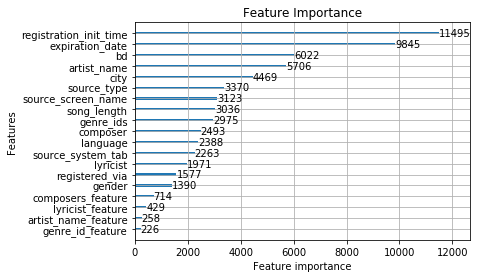

In [43]:
plt.figure(figsize=(20,8))
lgb.plot_importance(lgbm_model, max_num_features=30)
plt.title("Feature Importance")
plt.show()

In [44]:
predict = lgbm_model.predict(test)
predict

array([0.54985674, 0.57424949, 0.14512801, ..., 0.29396732, 0.2398845 ,
       0.26215434])